# Generating Text with Neural Networks

In [49]:
#import paskaes 
import matplotlib.pyplot as plt


import numpy as np
import tensorflow as tf 

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Building the Word Vocabulary

In [204]:
#sample data 
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."


In [205]:
#preprossing text 
corpus = data.lower().split("\n")

print(corpus)

['in the town of athy one jeremy lanigan ', ' battered away til he hadnt a pound. ', 'his father died and made him a man again ', ' left him a farm and ten acres of ground. ', 'he gave a grand party for friends and relations ', 'who didnt forget him when come to the wall, ', 'and if youll but listen ill make your eyes glisten ', 'of the rows and the ructions of lanigans ball. ', 'myself to be sure got free invitation, ', 'for all the nice girls and boys i might ask, ', 'and just in a minute both friends and relations ', 'were dancing round merry as bees round a cask. ', 'judy odaly, that nice little milliner, ', 'she tipped me a wink for to give her a call, ', 'and i soon arrived with peggy mcgilligan ', 'just in time for lanigans ball. ', 'there were lashings of punch and wine for the ladies, ', 'potatoes and cakes; there was bacon and tea, ', 'there were the nolans, dolans, ogradys ', 'courting the girls and dancing away. ', 'songs they went round as plenty as water, ', 'the harp tha

In [206]:
# Initialize the Tokenizer class
tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)

In [207]:
## Define the total words.
# add 1 for the index `0` which is just the padding token.

total_words= len(tokenizer.word_index)+1
print(f'total words: {total_words}')

total words: 263


### Preprocessing the Dataset


In [208]:
# Initialize the sequences list
input_sequences = []

In [209]:
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        
        input_sequences.append(n_gram_sequence)

In [210]:
input_sequences

[[4, 2],
 [4, 2, 66],
 [4, 2, 66, 8],
 [4, 2, 66, 8, 67],
 [4, 2, 66, 8, 67, 68],
 [4, 2, 66, 8, 67, 68, 69],
 [4, 2, 66, 8, 67, 68, 69, 70],
 [71, 40],
 [71, 40, 20],
 [71, 40, 20, 21],
 [71, 40, 20, 21, 72],
 [71, 40, 20, 21, 72, 3],
 [71, 40, 20, 21, 72, 3, 73],
 [16, 74],
 [16, 74, 75],
 [16, 74, 75, 1],
 [16, 74, 75, 1, 76],
 [16, 74, 75, 1, 76, 33],
 [16, 74, 75, 1, 76, 33, 3],
 [16, 74, 75, 1, 76, 33, 3, 77],
 [16, 74, 75, 1, 76, 33, 3, 77, 22],
 [41, 33],
 [41, 33, 3],
 [41, 33, 3, 78],
 [41, 33, 3, 78, 1],
 [41, 33, 3, 78, 1, 79],
 [41, 33, 3, 78, 1, 79, 80],
 [41, 33, 3, 78, 1, 79, 80, 8],
 [41, 33, 3, 78, 1, 79, 80, 8, 81],
 [21, 82],
 [21, 82, 3],
 [21, 82, 3, 83],
 [21, 82, 3, 83, 84],
 [21, 82, 3, 83, 84, 7],
 [21, 82, 3, 83, 84, 7, 42],
 [21, 82, 3, 83, 84, 7, 42, 1],
 [21, 82, 3, 83, 84, 7, 42, 1, 43],
 [85, 86],
 [85, 86, 87],
 [85, 86, 87, 33],
 [85, 86, 87, 33, 44],
 [85, 86, 87, 33, 44, 88],
 [85, 86, 87, 33, 44, 88, 13],
 [85, 86, 87, 33, 44, 88, 13, 2],
 [85, 86, 

In [211]:
# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

input_sequences=np.array(pad_sequences(input_sequences  ,maxlen=max_sequence_len ,padding='pre'))

In [212]:
xs= input_sequences[:,:-1]
labels =input_sequences[:,-1]

In [213]:
labels

array([  2,  66,   8,  67,  68,  69,  70,  40,  20,  21,  72,   3,  73,
        74,  75,   1,  76,  33,   3,  77,  22,  33,   3,  78,   1,  79,
        80,   8,  81,  82,   3,  83,  84,   7,  42,   1,  43,  86,  87,
        33,  44,  88,  13,   2,  45,  89,  90,  91,  92,  93,  94,  95,
        96,  97,   2,  98,   1,   2,  99,   8,   9,  10,  13, 100, 101,
        23, 102, 103,   5,   2,  47,  17,   1,  24,   6, 104, 105,  48,
         4,   3, 106, 107,  42,   1,  43,  49,  25,  50,  18, 108,  25,
         3, 109, 111,  26,  47, 112, 113,  51,  52,   3, 114,   7,  13,
       115,  27,   3, 116,   6,  53, 117, 118, 119, 120,   4,  54,   7,
         9,  10,  11, 121,   8, 122,   1, 123,   7,   2, 124,   1, 126,
        28,  34, 127,   1, 128,  11,   2, 129, 130, 131,   2,  17,   1,
        49,  40,  19, 134,  25,  18, 135,  18, 136, 137,  26, 138, 139,
         4, 140,  55, 141, 143, 144,   1,   2, 145, 146, 147, 148, 149,
        12,   9,  10,  11, 150,   5, 151,   8, 152, 153,  25,   

In [214]:
# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels , num_classes=total_words)

In [215]:
ys

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [216]:
# Get sample sentence
sentence = corpus[0].split()
print(corpus[0])
print(f'sample sentence: {sentence}')

in the town of athy one jeremy lanigan 
sample sentence: ['in', 'the', 'town', 'of', 'athy', 'one', 'jeremy', 'lanigan']


In [217]:
# Initialize token list
token_list = []

In [218]:
for w in sentence:
    token_list.append(tokenizer.word_index[w])

In [219]:
print(token_list)


[4, 2, 66, 8, 67, 68, 69, 70]


In [220]:
# Pick element
elem_number = 6
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

token list: [ 0  0  0  4  2 66  8 67 68 69]
decoded to text: ['in the town of athy one jeremy']


In [221]:
#print label 
#print(ys[elem_number])
print(np.argmax(ys[elem_number]))

70


In [222]:
elem_number=5
print(xs[5])
print(tokenizer.sequences_to_texts([xs[elem_number]]))

[ 0  0  0  0  4  2 66  8 67 68]
['in the town of athy one']


In [223]:
print(np.argmax(ys[elem_number]))

69


# Build the Model

In [224]:
#build model 
model = tf.keras.Sequential([
    Embedding(total_words ,64 , input_length=max_sequence_len-1),
    Bidirectional(LSTM(20)),
    Dense(total_words , activation='softmax')
])

In [225]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [226]:
# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 10, 64)            16832     
                                                                 
 bidirectional_3 (Bidirecti  (None, 40)                13600     
 onal)                                                           
                                                                 
 dense_3 (Dense)             (None, 263)               10783     
                                                                 
Total params: 41215 (161.00 KB)
Trainable params: 41215 (161.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###### Train the model

In [227]:
# Train the model
history = model.fit(xs, ys, epochs=500)

Epoch 1/500
15/15 [==============================] - 3s 10ms/step - loss: 5.5681 - accuracy: 0.0265
Epoch 2/500
15/15 [==============================] - 0s 11ms/step - loss: 5.5421 - accuracy: 0.0508
Epoch 3/500
15/15 [==============================] - 0s 9ms/step - loss: 5.4822 - accuracy: 0.0508
Epoch 4/500
15/15 [==============================] - 0s 11ms/step - loss: 5.3128 - accuracy: 0.0508
Epoch 5/500
15/15 [==============================] - 0s 9ms/step - loss: 5.1329 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 10ms/step - loss: 5.0685 - accuracy: 0.0508
Epoch 7/500
15/15 [==============================] - 0s 8ms/step - loss: 5.0266 - accuracy: 0.0530
Epoch 8/500
15/15 [==============================] - 0s 9ms/step - loss: 4.9891 - accuracy: 0.0574
Epoch 9/500
15/15 [==============================] - 0s 10ms/step - loss: 4.9497 - accuracy: 0.0574
Epoch 10/500
15/15 [==============================] - 0s 10ms/step - loss: 4.9078 - accuracy: 0.0618
Epo

15/15 [==============================] - 0s 10ms/step - loss: 2.6445 - accuracy: 0.4415
Epoch 83/500
15/15 [==============================] - 0s 11ms/step - loss: 2.6138 - accuracy: 0.4570
Epoch 84/500
15/15 [==============================] - 0s 10ms/step - loss: 2.5865 - accuracy: 0.4547
Epoch 85/500
15/15 [==============================] - 0s 12ms/step - loss: 2.5607 - accuracy: 0.4790
Epoch 86/500
15/15 [==============================] - 0s 12ms/step - loss: 2.5303 - accuracy: 0.4834
Epoch 87/500
15/15 [==============================] - 0s 10ms/step - loss: 2.5052 - accuracy: 0.4923
Epoch 88/500
15/15 [==============================] - 0s 9ms/step - loss: 2.4892 - accuracy: 0.5011
Epoch 89/500
15/15 [==============================] - 0s 9ms/step - loss: 2.4601 - accuracy: 0.5099
Epoch 90/500
15/15 [==============================] - 0s 11ms/step - loss: 2.4374 - accuracy: 0.5077
Epoch 91/500
15/15 [==============================] - 0s 11ms/step - loss: 2.4101 - accuracy: 0.5276
Epoch

15/15 [==============================] - 0s 10ms/step - loss: 1.1706 - accuracy: 0.8344
Epoch 163/500
15/15 [==============================] - 0s 11ms/step - loss: 1.1594 - accuracy: 0.8433
Epoch 164/500
15/15 [==============================] - 0s 12ms/step - loss: 1.1623 - accuracy: 0.8455
Epoch 165/500
15/15 [==============================] - 0s 11ms/step - loss: 1.1627 - accuracy: 0.8300
Epoch 166/500
15/15 [==============================] - 0s 10ms/step - loss: 1.1656 - accuracy: 0.8278
Epoch 167/500
15/15 [==============================] - 0s 12ms/step - loss: 1.1492 - accuracy: 0.8366
Epoch 168/500
15/15 [==============================] - 0s 12ms/step - loss: 1.1314 - accuracy: 0.8433
Epoch 169/500
15/15 [==============================] - 0s 12ms/step - loss: 1.1159 - accuracy: 0.8565
Epoch 170/500
15/15 [==============================] - 0s 10ms/step - loss: 1.0955 - accuracy: 0.8521
Epoch 171/500
15/15 [==============================] - 0s 10ms/step - loss: 1.0867 - accuracy: 0

15/15 [==============================] - 0s 11ms/step - loss: 0.5691 - accuracy: 0.9249
Epoch 243/500
15/15 [==============================] - 0s 11ms/step - loss: 0.5569 - accuracy: 0.9272
Epoch 244/500
15/15 [==============================] - 0s 12ms/step - loss: 0.5576 - accuracy: 0.9272
Epoch 245/500
15/15 [==============================] - 0s 11ms/step - loss: 0.5521 - accuracy: 0.9272
Epoch 246/500
15/15 [==============================] - 0s 13ms/step - loss: 0.5390 - accuracy: 0.9249
Epoch 247/500
15/15 [==============================] - 0s 15ms/step - loss: 0.5322 - accuracy: 0.9249
Epoch 248/500
15/15 [==============================] - 0s 11ms/step - loss: 0.5320 - accuracy: 0.9249
Epoch 249/500
15/15 [==============================] - 0s 12ms/step - loss: 0.5284 - accuracy: 0.9294
Epoch 250/500
15/15 [==============================] - 0s 11ms/step - loss: 0.5245 - accuracy: 0.9272
Epoch 251/500
15/15 [==============================] - 0s 11ms/step - loss: 0.5144 - accuracy: 0

15/15 [==============================] - 0s 10ms/step - loss: 0.3027 - accuracy: 0.9426
Epoch 323/500
15/15 [==============================] - 0s 11ms/step - loss: 0.3012 - accuracy: 0.9426
Epoch 324/500
15/15 [==============================] - 0s 12ms/step - loss: 0.2989 - accuracy: 0.9382
Epoch 325/500
15/15 [==============================] - 0s 10ms/step - loss: 0.2971 - accuracy: 0.9448
Epoch 326/500
15/15 [==============================] - 0s 12ms/step - loss: 0.2952 - accuracy: 0.9426
Epoch 327/500
15/15 [==============================] - 0s 15ms/step - loss: 0.2932 - accuracy: 0.9448
Epoch 328/500
15/15 [==============================] - 0s 11ms/step - loss: 0.2931 - accuracy: 0.9404
Epoch 329/500
15/15 [==============================] - 0s 9ms/step - loss: 0.2918 - accuracy: 0.9382
Epoch 330/500
15/15 [==============================] - 0s 12ms/step - loss: 0.2894 - accuracy: 0.9426
Epoch 331/500
15/15 [==============================] - 0s 10ms/step - loss: 0.2872 - accuracy: 0.

15/15 [==============================] - 0s 10ms/step - loss: 0.2027 - accuracy: 0.9470
Epoch 403/500
15/15 [==============================] - 0s 9ms/step - loss: 0.2010 - accuracy: 0.9470
Epoch 404/500
15/15 [==============================] - 0s 8ms/step - loss: 0.1997 - accuracy: 0.9426
Epoch 405/500
15/15 [==============================] - 0s 9ms/step - loss: 0.1979 - accuracy: 0.9470
Epoch 406/500
15/15 [==============================] - 0s 10ms/step - loss: 0.1966 - accuracy: 0.9448
Epoch 407/500
15/15 [==============================] - 0s 10ms/step - loss: 0.1953 - accuracy: 0.9448
Epoch 408/500
15/15 [==============================] - 0s 9ms/step - loss: 0.1952 - accuracy: 0.9426
Epoch 409/500
15/15 [==============================] - 0s 9ms/step - loss: 0.1942 - accuracy: 0.9470
Epoch 410/500
15/15 [==============================] - 0s 8ms/step - loss: 0.1924 - accuracy: 0.9492
Epoch 411/500
15/15 [==============================] - 0s 8ms/step - loss: 0.1919 - accuracy: 0.9448
E

15/15 [==============================] - 0s 11ms/step - loss: 0.1465 - accuracy: 0.9492
Epoch 483/500
15/15 [==============================] - 0s 9ms/step - loss: 0.1460 - accuracy: 0.9448
Epoch 484/500
15/15 [==============================] - 0s 10ms/step - loss: 0.1462 - accuracy: 0.9492
Epoch 485/500
15/15 [==============================] - 0s 11ms/step - loss: 0.1459 - accuracy: 0.9382
Epoch 486/500
15/15 [==============================] - 0s 11ms/step - loss: 0.1452 - accuracy: 0.9448
Epoch 487/500
15/15 [==============================] - 0s 9ms/step - loss: 0.1442 - accuracy: 0.9448
Epoch 488/500
15/15 [==============================] - 0s 8ms/step - loss: 0.1450 - accuracy: 0.9470
Epoch 489/500
15/15 [==============================] - 0s 9ms/step - loss: 0.1440 - accuracy: 0.9470
Epoch 490/500
15/15 [==============================] - 0s 10ms/step - loss: 0.1435 - accuracy: 0.9492
Epoch 491/500
15/15 [==============================] - 0s 9ms/step - loss: 0.1440 - accuracy: 0.9426

In [228]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()


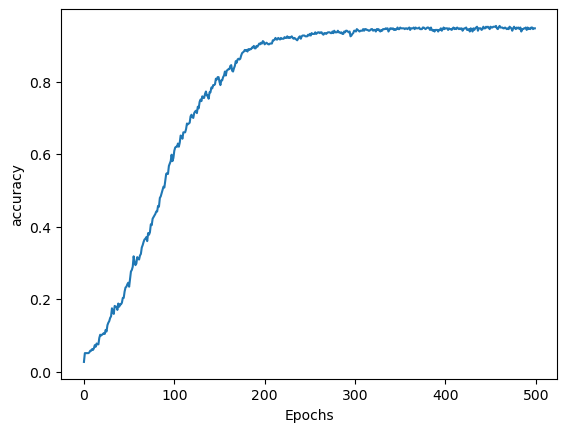

In [229]:
plot_graphs(history, 'accuracy')


In [230]:
#######################################################################################

In [231]:
#######################################################################################

In [232]:
#######################################################################################

In [233]:
seed_text = "Laurence went to Dublin"


In [234]:
next_words=100
for _ in range(next_words):
    token_list= tokenizer.texts_to_sequences([seed_text])[0]
    
    token_list=pad_sequences([token_list], maxlen=max_sequence_len-1 , padding='pre')
    
    prob= model.predict(token_list)
    
    choice = np.random.choice([1,2,3])
    
    predicted = np.argsort(prob)[0][-choice]
    
    if predicted!=0:
        output_word = tokenizer.index_word[predicted]
        
        seed_text += ' ' +output_word
print(seed_text)
    

1/1 [==============================] - 0s 16ms/step
Laurence went to Dublin an from under and acres all all new at spent all new steps new stepped stepped and in and call hall might mchugh call might call glisten glisten your further hoops eyes twas ogradys glisten glisten father glisten glisten glisten cask youd eyes entangled forget entangled odaly wall cask replied at odaly cakes reel and give her in murther jig nice ask hall hall ask eyes i suppose right wine to entangled til hall hoops ned call glisten jig suppose cask acres long all relations jig all new them entangled forget oh boys fainted were i girls and i banished


In [235]:
def predict_next_word(seed_text):
    token_list=tokenizer.texts_to_sequences([seed_text])[0]
    token_list=pad_sequences([token_list] , maxlen=max_sequence_len-1 , padding='pre')
    
    predicted = model.predict(token_list)
    predicted = np.argmax(predicted , axis=-1)[0]
    
    output_word= tokenizer.index_word[predicted]
    seed_text+= " " +  output_word
    return seed_text

In [236]:
seed_text = "Laurence went to Dublin"

for i in range(100):
    seed_text=predict_next_word(seed_text)
    print(predict_next_word(seed_text))

1/1 [==============================] - 0s 68ms/step
Laurence went to Dublin an from
1/1 [==============================] - 0s 11ms/step
Laurence went to Dublin an from row
1/1 [==============================] - 0s 16ms/step
Laurence went to Dublin an from row miss
1/1 [==============================] - 0s 20ms/step
Laurence went to Dublin an from row miss kerrigan
1/1 [==============================] - 0s 40ms/step
Laurence went to Dublin an from row miss kerrigan acres
1/1 [==============================] - 0s 16ms/step
Laurence went to Dublin an from row miss kerrigan acres ground
1/1 [==============================] - 0s 24ms/step
Laurence went to Dublin an from row miss kerrigan acres ground forget
1/1 [==============================] - 0s 24ms/step
Laurence went to Dublin an from row miss kerrigan acres ground forget the
1/1 [==============================] - 0s 21ms/step
Laurence went to Dublin an from row miss kerrigan acres ground forget the dublin
1/1 [========================

1/1 [==============================] - 0s 16ms/step
Laurence went to Dublin an from row miss kerrigan acres ground forget the dublin dublin might ask rat introduction glisten call glisten glisten glisten glisten glisten youd glisten glisten cask fainted odaly call glisten glisten father glisten glisten glisten glisten
1/1 [==============================] - 0s 35ms/step
Laurence went to Dublin an from row miss kerrigan acres ground forget the dublin dublin might ask rat introduction glisten call glisten glisten glisten glisten glisten youd glisten glisten cask fainted odaly call glisten glisten father glisten glisten glisten glisten father
1/1 [==============================] - 0s 15ms/step
Laurence went to Dublin an from row miss kerrigan acres ground forget the dublin dublin might ask rat introduction glisten call glisten glisten glisten glisten glisten youd glisten glisten cask fainted odaly call glisten glisten father glisten glisten glisten glisten father call
1/1 [================

1/1 [==============================] - 0s 17ms/step
Laurence went to Dublin an from row miss kerrigan acres ground forget the dublin dublin might ask rat introduction glisten call glisten glisten glisten glisten glisten youd glisten glisten cask fainted odaly call glisten glisten father glisten glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten
1/1 [==============================] - 0s 25ms/step
Laurence went to Dublin an from row miss kerrigan acres ground forget the dublin dublin might ask rat introduction glisten call glisten glisten glisten glisten glisten youd glisten glisten cask fainted odaly call glisten glisten father glisten glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten
1/1 [==============================] - 0s 22ms/step
Laurence went to Dublin an f

1/1 [==============================] - 0s 34ms/step
Laurence went to Dublin an from row miss kerrigan acres ground forget the dublin dublin might ask rat introduction glisten call glisten glisten glisten glisten glisten youd glisten glisten cask fainted odaly call glisten glisten father glisten glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten
1/1 [==============================] - 0s 16ms/step
Laurence went to Dublin an from row miss kerrigan acres ground forget the dublin dublin might ask rat introduction glisten call glisten glisten glisten glisten glisten youd glisten glisten cask fainted odaly call glisten glisten father glisten glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father c

1/1 [==============================] - 0s 17ms/step
Laurence went to Dublin an from row miss kerrigan acres ground forget the dublin dublin might ask rat introduction glisten call glisten glisten glisten glisten glisten youd glisten glisten cask fainted odaly call glisten glisten father glisten glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call
1/1 [==============================] - 0s 16ms/step
Laurence went to Dublin an from row miss kerrigan acres ground forget the dublin dublin might ask rat introduction glisten call glisten glisten glisten glisten glisten youd glisten glisten cask fainted odaly call glisten glisten father glisten glisten glisten glisten father call glisten glis

1/1 [==============================] - 0s 45ms/step
Laurence went to Dublin an from row miss kerrigan acres ground forget the dublin dublin might ask rat introduction glisten call glisten glisten glisten glisten glisten youd glisten glisten cask fainted odaly call glisten glisten father glisten glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten glisten glisten father call glisten
1/1 [==============================] - 0s 30ms/step
Laurence went to Dublin an from row miss kerrigan acres ground forget the dublin dublin might ask rat introduction glisten call glisten glisten glisten glisten glisten youd glisten glisten cask fainted odaly call

In [237]:
def predict_next_word(seed_text):
    token_list=tokenizer.texts_to_sequences([seed_text])[0]
    token_list=pad_sequences([token_list] , maxlen=max_sequence_len-1 , padding='pre')
    
    predicted = model.predict(token_list)
    predicted = np.argmax(predicted , axis=-1)[0]
    
    output_word= tokenizer.index_word[predicted]
    seed_text+= " " +  output_word
    
    return seed_text

In [238]:
seed_text = "Laurence went to Dublin"
predict_next_word(seed_text)

1/1 [==============================] - 0s 16ms/step


'Laurence went to Dublin an'

In [239]:
def generat(seed_text , nw):
    for i in range(nw):
        seed_text=predict_next_word(seed_text)
    return (predict_next_word(seed_text))

In [240]:
seed_text = "Laurence went to Dublin"
generat(seed_text,10)

1/1 [==============================] - 0s 17ms/step


'Laurence went to Dublin an from row miss kerrigan acres ground forget the dublin dublin'